# Data Pre-Processing

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Loading dataset
df = pd.read_excel('/Users/sukanya/Documents/Alziemers Multi Modal/Dataset/FINAL.xlsx')

X = df.drop(columns=['ID', 'Dementia_Category'])
y = df['Dementia_Category']

# Spliting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [21]:
df.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay,Dementia_Category
0,OAS1_0001_MR1,0,0,74,2.000000,3.000000,29.00000,0.000000,1344,0.743,1.306,20.55,2
1,OAS1_0002_MR1,0,0,55,4.000000,1.000000,29.00000,0.000000,1147,0.810,1.531,20.55,2
2,OAS1_0003_MR1,0,0,73,4.000000,3.000000,27.00000,0.500000,1454,0.708,1.207,20.55,0
3,OAS1_0004_MR1,1,0,28,3.178723,2.490741,27.06383,0.285106,1588,0.803,1.105,20.55,2
4,OAS1_0005_MR1,1,0,18,3.178723,2.490741,27.06383,0.285106,1737,0.848,1.010,20.55,2


## Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

log_reg = LogisticRegression(max_iter=200)

# Training
log_reg.fit(X_train_scaled, y_train)

y_pred_log_reg = log_reg.predict(X_test_scaled)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
report_log_reg = classification_report(y_test, y_pred_log_reg)

print("Logistic Regression")
print(f"Accuracy: {accuracy_log_reg}")
print(report_log_reg)

Logistic Regression
Accuracy: 0.945273631840796
              precision    recall  f1-score   support

           0       0.81      0.91      0.86        23
           1       0.71      0.50      0.59        10
           2       1.00      0.96      0.98       102
           3       0.94      1.00      0.97        66

    accuracy                           0.95       201
   macro avg       0.87      0.84      0.85       201
weighted avg       0.95      0.95      0.94       201



<Figure size 800x600 with 0 Axes>

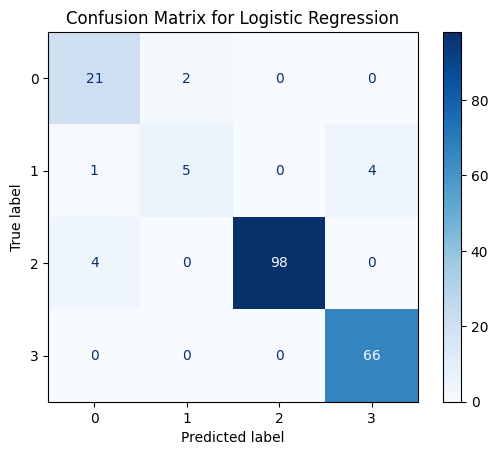

In [32]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_log_reg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)

plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

## Support Vector Machine

In [23]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

print("SVM Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}")
print(classification_report(y_test, y_pred_svm))

SVM Results:
Accuracy: 0.8955223880597015
              precision    recall  f1-score   support

           0       0.62      0.70      0.65        23
           1       0.20      0.10      0.13        10
           2       0.97      0.95      0.96       102
           3       0.94      1.00      0.97        66

    accuracy                           0.90       201
   macro avg       0.68      0.69      0.68       201
weighted avg       0.88      0.90      0.89       201



<Figure size 800x600 with 0 Axes>

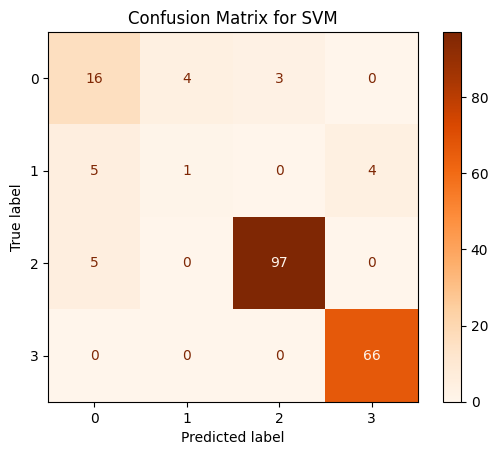

In [38]:
# Confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm.classes_)

plt.figure(figsize=(8, 6))
disp_svm.plot(cmap=plt.cm.Oranges, values_format='d')
plt.title("Confusion Matrix for SVM")
plt.show()

## Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50)

# Training
rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print("Random Forest")
print(f"Accuracy: {accuracy_rf}")
print(report_rf)

Random Forest
Accuracy: 0.9900497512437811
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        23
           1       1.00      0.80      0.89        10
           2       1.00      1.00      1.00       102
           3       1.00      1.00      1.00        66

    accuracy                           0.99       201
   macro avg       0.98      0.95      0.96       201
weighted avg       0.99      0.99      0.99       201



<Figure size 800x600 with 0 Axes>

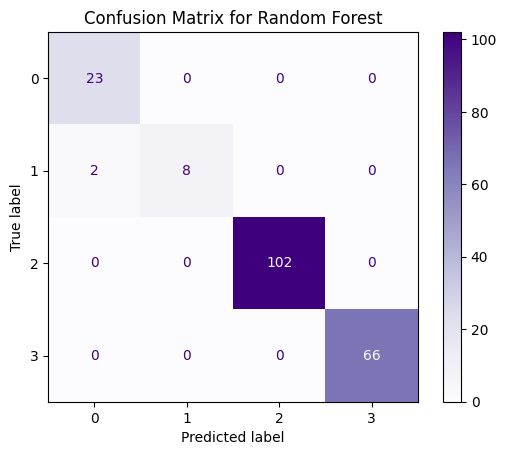

In [39]:
# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf.classes_)

plt.figure(figsize=(8, 6))
disp_rf.plot(cmap=plt.cm.Purples, values_format='d')
plt.title("Confusion Matrix for Random Forest")
plt.show()

## K-Nearest Neighbors

In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

print("KNN Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print(classification_report(y_test, y_pred_knn))

KNN Results:
Accuracy: 0.7910447761194029
              precision    recall  f1-score   support

           0       0.41      0.52      0.46        23
           1       0.15      0.20      0.17        10
           2       0.93      0.85      0.89       102
           3       0.89      0.88      0.89        66

    accuracy                           0.79       201
   macro avg       0.60      0.61      0.60       201
weighted avg       0.82      0.79      0.80       201



<Figure size 800x600 with 0 Axes>

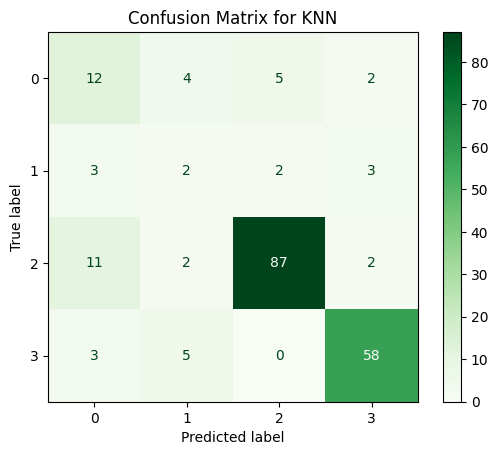

In [35]:
# Confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn.classes_)

plt.figure(figsize=(8, 6))
disp_knn.plot(cmap=plt.cm.Greens, values_format='d') 
plt.title("Confusion Matrix for KNN")
plt.show()

# **Comparision of Algorithms:**

| Metric/Model        | Logistic Regression | SVM               | Random Forest      | KNN               |
|---------------------|---------------------|-------------------|--------------------|-------------------|
| **Accuracy**         | 0.945               | 0.896             | 0.990              | 0.791             |
| **Precision**        | 0.95           | 0.88              | 0.99               | 0.82              |
| **Recall**   | 0.95           | 0.90              | 0.99               | 0.79              |
| **F1-Score** | 0.94           | 0.89              | 0.99               | 0.80              |


## Performance-wise order of the models
### 1. Random Forest
### 2. Logistic Regression
### 3. SVM
### 4. KNN